In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import keras

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pandas import DataFrame

Using TensorFlow backend.


In [2]:
train_df = pd.read_csv("sphericitydata.csv")


In [69]:
dummy_y


,sphericity,predicted
485,0.504779,0.531015
588,0.512303,0.598288
819,0.524246,0.533071
220,0.567323,0.580401
488,0.571769,0.695265
484,0.571776,0.695265
784,0.572184,0.622047
577,0.574365,0.577152
558,0.584263,0.666272
503,0.587102,0.664665


In [74]:
train_X = train_df.iloc[:,1:41] 

train_y_letters = train_df.iloc[:,0:1]

sc = StandardScaler()
train_X = sc.fit_transform(train_X)

#pca = PCA()
#train_X = pca.fit_transform(train_X)

dummy_y= train_y_letters
n_cols  = train_X.shape[1]
model = Sequential()
model.add(Dense(50, activation="relu", input_shape=(n_cols,)))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(1,activation="linear"))
model.compile(optimizer='adam', loss='mean_squared_error')
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=4)
#train model
model.fit(train_X, dummy_y, validation_split=0.2, epochs=1000, callbacks=[early_stopping_monitor], verbose = 0)
ynew = model.predict(train_X)
diff = abs(ynew - dummy_y)
dummy_y['predicted'] = ynew
dummy_y = DataFrame(dummy_y, columns= ['sphericity','predicted']).sort_values(by=['sphericity'])

C:\Users\HeavyRain350\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HeavyRain350\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


<function matplotlib.pyplot.show(*args, **kw)>

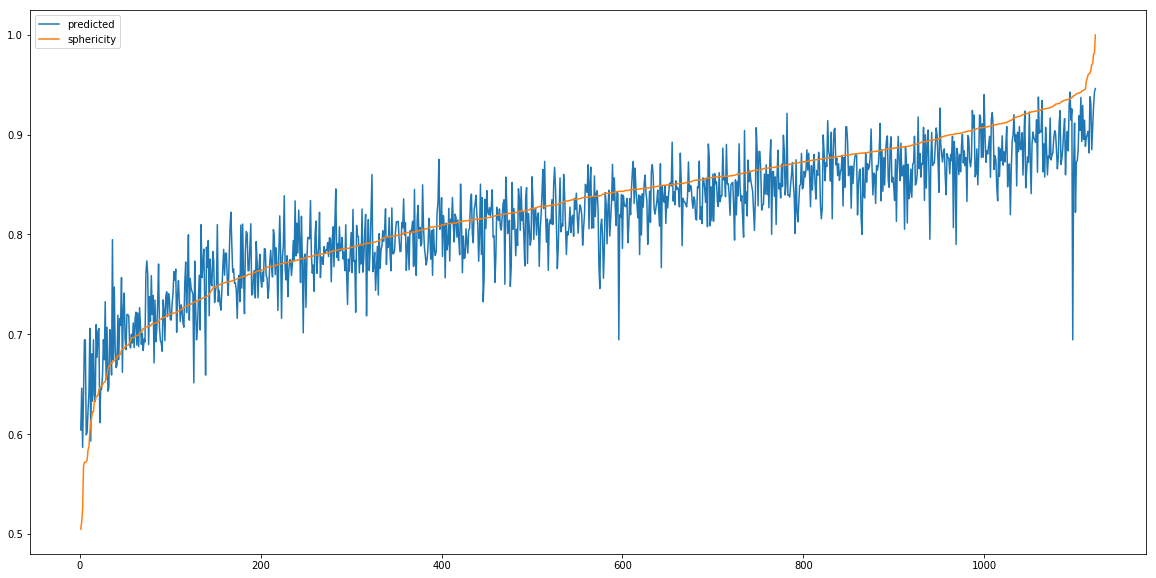

In [75]:
plt.figure(figsize=(20,10))
plt.plot(range(1,1124),dummy_y['predicted'], label="predicted")
plt.plot(range(1,1124),dummy_y['sphericity'], label="sphericity")
plt.legend(loc="upper left")
plt.show

In [15]:
dummy_y

,sphericity,predicted
485,0.504779,0.571393
588,0.512303,0.588579
819,0.524246,0.589135
220,0.567323,0.633740
488,0.571769,0.694777
484,0.571776,0.694777
784,0.572184,0.596849
577,0.574365,0.610372
558,0.584263,0.618225
503,0.587102,0.613917
